In [1]:
# Importing necessary libraries

from sklearn                 import svm,datasets
from sklearn.metrics         import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import label_binarize
from sklearn.multiclass      import OneVsRestClassifier

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#Loading and reading data

lv_iris = datasets.load_iris()
print("Names of independent variables are :\n",lv_iris.feature_names)
print("Categories of dependent variables are:",lv_iris.target_names)

lv_x_iris = lv_iris.data
lv_y_iris = lv_iris.target
print('Dimension of dependent variables:',lv_x_iris.shape)

Names of independent variables are :
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Categories of dependent variables are: ['setosa' 'versicolor' 'virginica']
Dimension of dependent variables: (150, 4)


In [3]:
#Binarize the dependent variable

lv_y_iris = label_binarize(lv_y_iris,classes = [0,1,2])
lv_num_class = lv_y_iris.shape[1]

In [4]:
#Create training and test sets

lv_x_train,lv_x_test,lv_y_train,lv_y_test = train_test_split(lv_x_iris,lv_y_iris,
                                                             test_size = 0.5,
                                                            random_state = 0)

In [5]:
#Using one veresur rest classifier for multiple classification 

lv_classifier = OneVsRestClassifier(svm.SVC(kernel = 'linear',
                                           probability = True,
                                           random_state = 0))

lv_y_score = lv_classifier.fit(lv_x_train,lv_y_train).decision_function(lv_x_test)

In [6]:
#Creating dictionary for false positive , true positive , AUC

lv_fpr = dict()
lv_tpr = dict()
roc_auc = dict()

In [7]:
#Execute ROC Curve and compute ROC area for each class

for i in range(lv_num_class):
    lv_fpr[i],lv_tpr[i],_ = roc_curve(lv_y_test[:,i],lv_y_score[:,i])
    roc_auc[i] = auc(lv_fpr[i],lv_tpr[i])

No handles with labels found to put in legend.


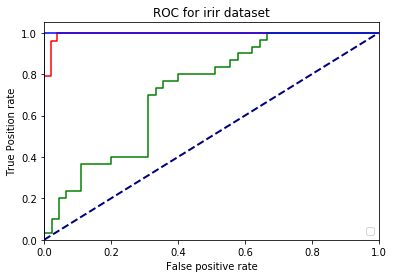

In [14]:
#Plot ROC curve for all the classes
plt.figure()
plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
plt.plot(lv_fpr[2],lv_tpr[2],color = 'red')
plt.plot(lv_fpr[1],lv_tpr[1],color = 'green')
plt.plot(lv_fpr[0],lv_tpr[0],color = 'blue')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True Position rate')
plt.title('ROC for irir dataset')
plt.legend(loc = "lower right")
plt.show()
